In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [10]:
class general_additive_binomial_valuation:
    def __init__(self,K,T,S,sig,r,N):
        self.K = K
        self.T = T
        self.S = S
        self.sig = sig
        self.r = r
        self.N = N
        self.dt = self.T/self.N
        self.nu = self.r-0.5*pow(self.sig,2)
        self.dxu = math.sqrt(pow(self.sig,2)*self.dt + pow((self.nu*self.dt),2))
        self.dxd = -self.dxu
        self.pu = 1/2 + 1/2*(self.nu*self.dt/self.dxu)
        self.pd = 1-self.pu
        self.disc = math.exp(-r*self.dt)

    def asset_prices_at_maturity_time_step_N(self):
        St=np.empty(self.N+1)
        St[0]=self.S*math.exp(self.N*self.dxd)
        for j in range(self.N):
            St[j+1]=St[j]*math.exp(self.dxu-self.dxd)
        return St

    def option_values_at_maturity(self):
        St=self.asset_prices_at_maturity_time_step_N()
        C=np.empty(self.N+1)
        for j in range(self.N+1):
            C[j]=max(0.0, St[j]-self.K)
        return C

    def europeanCall(self):
        C=self.option_values_at_maturity()
        for i in range(self.N-1):  
            i=self.N-1-i
            #Variable i counts the step backward at which we will calculate the calls C_{i,j}
            for j in range(i):
                C[j]=self.disc*(self.pu*C[j+1]+self.pd*C[j])
        return C[0]

    def show(self):
        description="""
        General binomial tree model for valuate an European call option with strike price {strike},
        maturity date {maturity}, initial stock price {stockPrice}, interest market rate {rate},
        steps at maturity {steps}.
        """.format(strike=str(self.K),maturity=str(self.T),stockPrice=str(self.S),
                   rate=str(self.r),steps=str(self.N))
        print(description)

In [11]:
## Now we implement the dynamics of the asset price.
def asset_dynamics(T=1,N=3,sig=0.2):
    myEurOption = general_additive_binomial_valuation(100,T,100,sig,0.06,N)
    random.seed()
    sample = [2*random.randint(0,1)-1 for n in range(N)]
    sample = np.array(sample)
    sample = sample*myEurOption.dxd
    sample = sample.cumsum()
    image = [myEurOption.S*math.exp(x) for x in sample]
    plt.plot(np.arange(0,T,T/N),image)

## Also, we implement the dynamics of the option price
def option_dynamics(T=1,N=3,sig=0.2):
    myEurOption = general_additive_binomial_valuation(100,T,100,sig,0.06,N)
    random.seed()
    sample = [2*random.randint(0,1)-1 for n in range(N)]
    sample = np.array(sample)
    sample = sample*myEurOption.dxd
    sample = sample.cumsum()
    image = [max(myEurOption.S*math.exp(x)-myEurOption.K,0) for x in sample]
    plt.plot(np.arange(0,T,T/N),image)

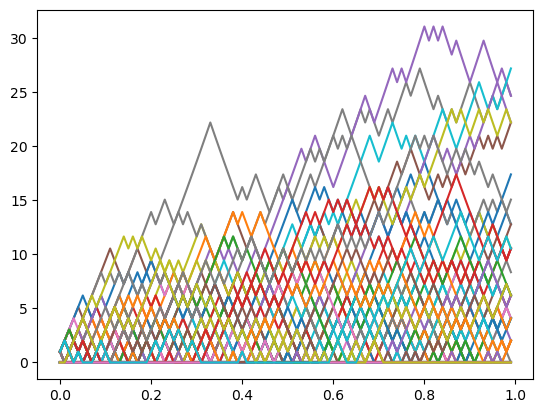

In [189]:
for k in range (100): 
    option_dynamics(1,100,0.1)